<p style='direction:rtl; text-align: right'>ابتدا باید کتابخانه های زیر را وارد کنیم:
    <ul style='direction:rtl; text-align: right'>
        <li>numpy: برای کار با ماتریس ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>PCA: برای کاهش بعد</li>
        <li>OpenCV: برای کار با عکس</li>
    </ul>
</p>
<p style='direction:rtl; text-align: right'>تذکر: اگر کتابخانه cv2 اجرا نشد باید آن را نصب کنید. در command prompt دستور زیر را اجرا کنید.
</p>
<p style='direction:rtl; text-align: right'> pip install opencv-python
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

<h1 style='direction:rtl; text-align: right'>
پروژه ۲: استفاده از کاهش بعد در تصویر
</h1>

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۱: خواندن فایل تصویر مربوط به شماره دانشجویی خود
</h2>
<p style='direction:rtl; text-align: right'>با استفاده از تابع imread موجود در کتابخانه <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">OpenCV</a> عکس مربوط به شماره دانشجویی خود را فراخوانی کنید:</p>

In [38]:
#image1 = cv2.imread("1121857.jpg")
path = r'C:\Users\esmaeilzadeh_PC\Downloads\Pictures\Pictures\9906094.jpg'
image1=cv2.imread(path)

<p style='direction:rtl; text-align: right'>عکس خوانده شده را به فرمت <a href="https://www.w3schools.com/colors/colors_rgb.asp">RGB</a> در می آوریم:</p>

In [39]:
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

<p style='direction:rtl; text-align: right'>
    همانطور که می بینید عکس خوانده شده به ازای هر پیکسل ۳ عدد دارد: بنابراین برای هر عکس رنگی x*y یک آرایه x*y*3 خواهیم داشت.</p>

In [40]:
dim=image.shape
print('Image shape =',dim)

Image shape = (1200, 1920, 3)


<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۲: نمایش تصویر
</h2>
<p style='direction:rtl; text-align: right'>با استفاده از تابع imshow موجود در <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/">matplotlib</a> تصویر خوانده شده را نمایش دهید:</p>

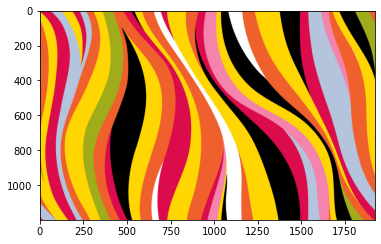

In [41]:
plt.imshow(image)
plt.show()

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۳: آماده سازی تصویر برای کاهش بعد
</h2>
<p style='direction:rtl; text-align: right'>سه ماتریس رنگ را در ماتریس های R,G,B ذخیره کنید:</p>

In [42]:
R=image[:,:,0]
G=image[:,:,1]
B=image[:,:,2]
print(R.shape)
print(G.shape)
print(B.shape)

(1200, 1920)
(1200, 1920)
(1200, 1920)


<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۴:استفاده از PCA برای کاهش بعد
</h2>

<p style='direction:rtl; text-align: right'>    
با استفاده از کلاس PCA در کتابخانه sklearn کاهش بعد را انجام میدهیم.
    عملیات زیر را انجام دهید:
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">راهنمایی</a>
    <ul style='direction:rtl; text-align: right'>
        <li>برای هر یک از ماتریس های R,G,B یک شی PCA ایجاد کنید. تعداد مولفه ها را ۱۰ قرار دهید.</li>
        <li>با استفاده از تابع fit موجود در pca الگوریتم را روی ماتریس ها فیت کنید.</li>
        <li> با استفاده از دستور _explained_variance_ratio میتوانید ببینید هرکدام از مولفه ها چند درصد دیتای ماتریس را دارند. </li>
        <li> مشخص کنید که در ده مولفه اول چند درصد دیتا برای هر کدام از ماتریس ها حفظ شده اند. </li>
        <li> با استفاده از دستور bar مقادیر _explained_variance_ratio را رسم کنید </li> 
    </ul>

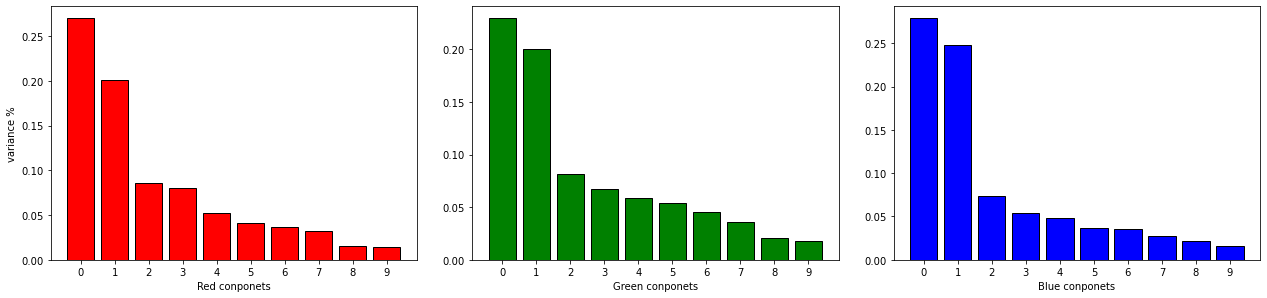

First 10 components of Red Matrix have  82.87 % of data.
First 10 components of Green Matrix have  81.23 % of data.
First 10 components of Blue Matrix have  84.07 % of data.


In [75]:
k=10

#print(R.shape)
pca1= PCA(n_components=k)
pca1.fit(R)
a1=pca1.explained_variance_ratio_
s1=0
for i in range(len(a1)):
    s1=s1+a1[i]
s1=round(s1*100,2)


#print(G.shape)
pca2= PCA(n_components=k)
pca2.fit(G)
a2=pca2.explained_variance_ratio_
s2=0
for i in range(len(a2)):
    s2=s2+a2[i]
s2=round(s2*100,2)


#print(B.shape)
pca3= PCA(n_components=k)
pca3.fit(B)
a3=pca3.explained_variance_ratio_
s3=0
for i in range(len(a3)):
    s3=s3+a3[i]
s3=round(s3*100,2)


#f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True)

y=a1
x=[0,1,2,3,4,5,6,7,8,9]
plt.subplot(1,3,1)
plt.bar([0,1,2,3,4,5,6,7,8,9], y, color="red", edgecolor='Black')
plt.xticks([0,1,2,3,4,5,6,7,8,9], x)
plt.xlabel('Red conponets')
plt.ylabel("variance %")




y=a2
x=[0,1,2,3,4,5,6,7,8,9]
plt.subplot(1,3,2)
plt.bar([0,1,2,3,4,5,6,7,8,9], y, color="GREEN", edgecolor='Black')
plt.xticks([0,1,2,3,4,5,6,7,8,9], x)
plt.xlabel('Green conponets')



y=a3
x=[0,1,2,3,4,5,6,7,8,9]
plt.subplot(1,3,3)
plt.bar([0,1,2,3,4,5,6,7,8,9], y, color="BLUE", edgecolor='Black')
plt.xticks([0,1,2,3,4,5,6,7,8,9], x)
plt.xlabel('Blue conponets')


plt.subplots_adjust(top=0.9, bottom=0.02, left=0.2, right=3, hspace=1,wspace=0.15)
plt.show()


print('First 10 components of Red Matrix have ', s1 ,'% of data.')
print('First 10 components of Green Matrix have ', s2 ,'% of data.')
print('First 10 components of Blue Matrix have ', s3 ,'% of data.')

<p style='direction:rtl; text-align: right'>عملیات زیر را انجام دهید:
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع transform موجود در pca دیتا با بعد کمتر را تولید کنید</li>
        <li> با استفاده از تابع inverse_transform دیتا را به بعد اولیه برگردانید </li>
    </ul>
</p>

In [44]:
Transform_R=pca1.transform(R)
Transform_B=pca3.transform(B)
Transform_G=pca2.transform(G)
Reduced_R=pca1.inverse_transform(Transform_R)
Reduced_G=pca2.inverse_transform(Transform_G)
Reduced_B=pca3.inverse_transform(Transform_B)

print('Transform Matrix Shape=',Transform_R.shape)
print('Inverse Transform Matrix Shape=',Reduced_R.shape)

Transform Matrix Shape= (1200, 10)
Inverse Transform Matrix Shape= (1200, 1920)


<p style='direction:rtl; text-align: right'>با استفاده از دستور concatenate سه ماتریس ً Reduced_R,Reduced_G,Reduced_B را کنار هم قرار دهید تا یک آرایه x*y*3 ایجاد شود. x , y همان ابعاد تصویر اولیه (image) هستند </p>
<p style='direction:rtl; text-align: right'>با استفاده از دستور astype ماتریس بدست آمده را به عدد صحیح تبدیل کنید.</p>

<p style='direction:rtl; text-align: right'>عکس بدست آمده را با imshow نمایش دهید.</p>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


final_image shape= (1200, 1920, 3)


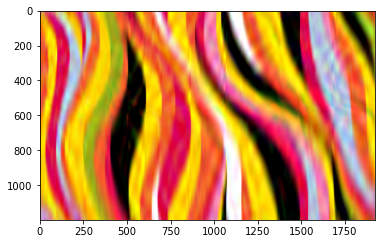

In [45]:
Reduced_R=Reduced_R.reshape(dim[0],dim[1],1)
Reduced_G=Reduced_G.reshape(dim[0],dim[1],1)
Reduced_B=Reduced_B.reshape(dim[0],dim[1],1)


reduced_image = np.concatenate((Reduced_R,Reduced_G,Reduced_B),axis=2)
final_image=reduced_image.astype('int64')
print('final_image shape=',final_image.shape)
plt.imshow(final_image)
plt.show()

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۵:استفاده از PCA برای کاهش بعد و حفظ ۹۹ درصد داده ها
</h2>

<p style='direction:rtl; text-align: right'> 
کل قسمت ۱.۴ را مجددا اجرا کنید. این بار تعداد مولفه ها را عددی قرار دهید که در هر سه ماتریس R,G,B حداقل ۹۹ درصد داده ها حفظ شود.
 

In [48]:
k=125
#print(R.shape)
pca1= PCA(n_components=k)
pca1.fit(R)
a1=pca1.explained_variance_ratio_
s1=0
for i in range(len(a1)):
    s1=s1+a1[i]
s1=round(s1*100,2)


#print(G.shape)
pca2= PCA(n_components=k)
pca2.fit(G)
a2=pca2.explained_variance_ratio_
s2=0
for i in range(len(a2)):
    s2=s2+a2[i]
s2=round(s2*100,2)


#print(B.shape)
pca3= PCA(n_components=k)
pca3.fit(B)
a3=pca3.explained_variance_ratio_
s3=0
for i in range(len(a3)):
    s3=s3+a3[i]
s3=round(s3*100,2)


print('First 150 components of Red Matrix have ', s1 ,'% of data.')
print('First 150 components of Green Matrix have ', s2 ,'% of data.')
print('First 150 components of Blue Matrix have ', s3 ,'% of data.')

First 150 components of Red Matrix have  99.17 % of data.
First 150 components of Green Matrix have  99.05 % of data.
First 150 components of Blue Matrix have  99.23 % of data.


In [49]:
Transform_R=pca1.transform(R)
Transform_B=pca3.transform(B)
Transform_G=pca2.transform(G)
Reduced_R=pca1.inverse_transform(Transform_R)
Reduced_G=pca2.inverse_transform(Transform_G)
Reduced_B=pca3.inverse_transform(Transform_B)

print('Transform Matrix Shape=',Transform_R.shape)
print('Inverse Transform Matrix Shape=',Reduced_R.shape)

Transform Matrix Shape= (1200, 125)
Inverse Transform Matrix Shape= (1200, 1920)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


final_image shape= (1200, 1920, 3)


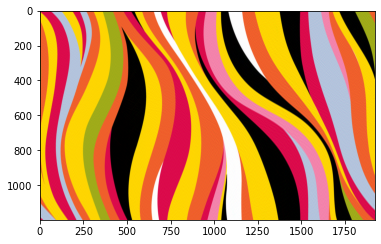

In [50]:
Reduced_R=Reduced_R.reshape(dim[0],dim[1],1)
Reduced_G=Reduced_G.reshape(dim[0],dim[1],1)
Reduced_B=Reduced_B.reshape(dim[0],dim[1],1)


reduced_image = np.concatenate((Reduced_R,Reduced_G,Reduced_B),axis=2)
final_image=reduced_image.astype('int64')
print('final_image shape=',final_image.shape)
plt.imshow(final_image)
plt.show()